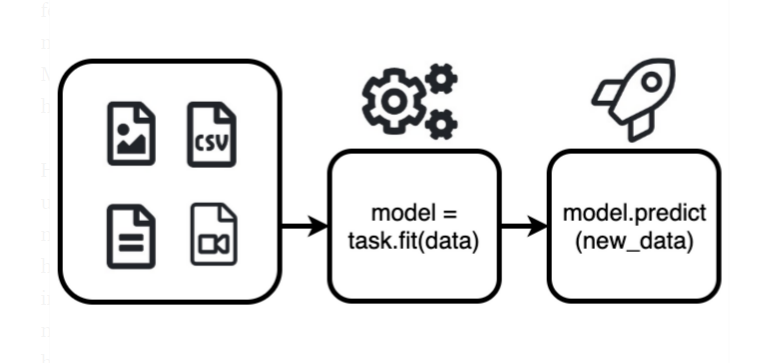

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.8 MB/s 
     |████████████████████████████████| 210 kB 12.9 MB/s 
     |████████████████████████████████| 61 kB 353 kB/s 
     |████████████████████████████████| 59 kB 6.5 MB/s 
     |████████████████████████████████| 149 kB 54.7 MB/s 
     |████████████████████████████████| 48 kB 5.6 MB/s 
     |████████████████████████████████| 274 kB 63.0 MB/s 
     |████████████████████████████████| 1.0 MB 67.3 MB/s 
     |████████████████████████████████| 802 kB 52.8 MB/s 
     |████████████████████████████████| 132 kB 61.1 MB/s 
     |████████████████████████████████| 54.5 MB 263 kB/s 
     |████████████████████████████████| 1.6 MB 56.3 MB/s 
     |████████████████████████████████| 291 kB 56.9 MB/s 
     |████████████████████████████████| 398 kB 73.3 MB/s 
     |████████████████████████████████| 109 kB 70.9 MB/s 
     |████████████████████████████████|

In [1]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor, ImageDataset

## Format Image Dataset
Our image classification task is based on a subset of the Shopee-IET dataset. Each image in this data depicts a clothing item and the corresponding label specifies its clothing category. Our subset of the data contains the following possible labels: BabyPants, BabyShirt, womencasualshoes, womenchiffontop. This dataset is quite small to ensure the tutorial can be run reasonably fast, so note that reported accuracy numbers may not be particularly reliable. We can download the data subset and unzip it via the following commands:

In [4]:
train_dataset, _, test_dataset = ImageDataset.from_folders('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
print(train_dataset)

data/
├── test/
└── train/
                                                 image  label
0    /root/.gluoncv/datasets/shopee-iet/data/train/...      0
1    /root/.gluoncv/datasets/shopee-iet/data/train/...      0
2    /root/.gluoncv/datasets/shopee-iet/data/train/...      0
3    /root/.gluoncv/datasets/shopee-iet/data/train/...      0
4    /root/.gluoncv/datasets/shopee-iet/data/train/...      0
..                                                 ...    ...
795  /root/.gluoncv/datasets/shopee-iet/data/train/...      3
796  /root/.gluoncv/datasets/shopee-iet/data/train/...      3
797  /root/.gluoncv/datasets/shopee-iet/data/train/...      3
798  /root/.gluoncv/datasets/shopee-iet/data/train/...      3
799  /root/.gluoncv/datasets/shopee-iet/data/train/...      3

[800 rows x 2 columns]


In [5]:
predictor = ImagePredictor()
predictor.fit(train_dataset, hyperparameters={'epochs': 2})  

INFO:autogluon.vision.predictor.predictor:`time_limit=auto` set to `time_limit=7200`.
INFO:autogluon.vision.predictor.predictor:Reset labels to [0, 1, 2, 3]
INFO:autogluon.vision.predictor.predictor:Randomly split train_data into train[720]/validation[80] splits.
INFO:autogluon.vision._gluoncv.image_classification:Starting fit without HPO
INFO:TorchImageClassificationEstimator:modified configs(<old> != <new>): {
INFO:TorchImageClassificationEstimator:root.img_cls.model   resnet101 != resnet50
INFO:TorchImageClassificationEstimator:root.train.early_stop_patience -1 != 10
INFO:TorchImageClassificationEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:TorchImageClassificationEstimator:root.train.batch_size 32 != 16
INFO:TorchImageClassificationEstimator:root.train.epochs    200 != 2
INFO:TorchImageClassificationEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:TorchImageClassificationEstimator:root.misc.seed       42 != 210
INFO:TorchImageClassificationEstimator:root.misc.n

In [6]:
predictor.fit_summary()

{'train_acc': 0.46805555555555556,
 'valid_acc': 0.725,
 'total_time': 24.465745210647583,
 'best_config': {'model': 'resnet50',
  'lr': 0.01,
  'epochs': 2,
  'batch_size': 16,
  'nthreads_per_trial': 128,
  'ngpus_per_trial': 8,
  'time_limits': 7200,
  'dist_ip_addrs': None,
  'searcher': 'random',
  'early_stop_patience': 10,
  'early_stop_baseline': -inf,
  'early_stop_max_value': inf,
  'num_workers': 2,
  'gpus': [0],
  'seed': 210,
  'final_fit': False},
 'fit_history': {'train_acc': 0.46805555555555556,
  'valid_acc': 0.725,
  'total_time': 24.465745210647583,
  'best_config': {'model': 'resnet50',
   'lr': 0.01,
   'epochs': 2,
   'batch_size': 16,
   'nthreads_per_trial': 128,
   'ngpus_per_trial': 8,
   'time_limits': 7200,
   'dist_ip_addrs': None,
   'searcher': 'random',
   'early_stop_patience': 10,
   'early_stop_baseline': -inf,
   'early_stop_max_value': inf,
   'num_workers': 2,
   'gpus': [0],
   'seed': 210,
   'final_fit': False}}}

In [7]:
image_path = test_dataset.iloc[0]['image']
result = predictor.predict(image_path)
print(result)

0    1
Name: label, dtype: int64


In [8]:
proba = predictor.predict_proba(image_path)
print(proba)

         0         1         2         3
0  0.26085  0.321264  0.234604  0.183282


In [9]:
bulk_result = predictor.predict(test_dataset)
print(bulk_result)

0     1
1     1
2     1
3     2
4     1
     ..
75    3
76    3
77    3
78    1
79    3
Name: label, Length: 80, dtype: int64


In [ ]:
filename = 'predictor.ag'
predictor.save(filename)
predictor_loaded = ImagePredictor.load(filename)
# use predictor_loaded as usual
result = predictor_loaded.predict(image_path)
print(result)

0    1
Name: label, dtype: int64
